Kyle Riener <br>
MSIS 2627 Individual project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Firearm deaths by country

Look at the firearm death rate of the United States compared to other developed countries around the world

In [2]:
world=pd.read_csv("World firearms murders and ownership - Sheet 1.csv")

In [3]:
world.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [5]:
world.dropna(subset=['Homicide by firearm rate per 100,000 pop'],inplace=True)

In [36]:
advanced=['Australia','Austria','Belgium','Canada','China','Denmark','England and Wales','Finland',
          'France','Ireland','Japan','Luxembourg','Netherlands','New Zealand','Sweden',
          'Switzerland','Germany','United States']
#these are mainly the countries used in the Vox article. I want to look more closely at countries that
#could be considered advanced. It could also be interesting to compare with less developed countries

In [37]:
df=world[world['Country/Territory'].isin(advanced)]

In [38]:
df=df.sort_values('Homicide by firearm rate per 100,000 pop',ascending=False)

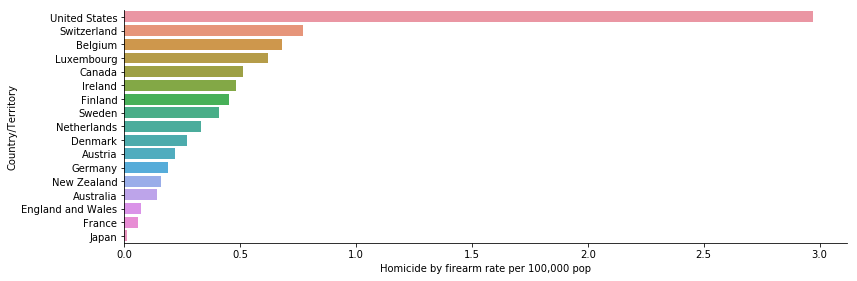

In [39]:
sb.factorplot(x='Homicide by firearm rate per 100,000 pop',y='Country/Territory',data=df,kind='bar',
             aspect=3)

Source: UNODC, Small Arms Survey via The Guardian via Vox
<br>
<br>

Possible edits:
-  add more developed countries
-  look at less developed countries
-  find something more exciting than bars

# Firearm death rate by state

Look at the firearm death rates and gun law grades by state

In [2]:
deaths=pd.read_csv("FIREARMS2016.csv")
gun_laws=pd.read_csv("StateGunLaws2016.csv")

In [43]:
deaths['state_abbr']=deaths['STATE']

In [3]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [47]:
deaths.STATE = deaths.state_abbr.map(states)

In [51]:
merged=gun_laws.merge(deaths,how='inner',left_on='State',right_on='STATE')

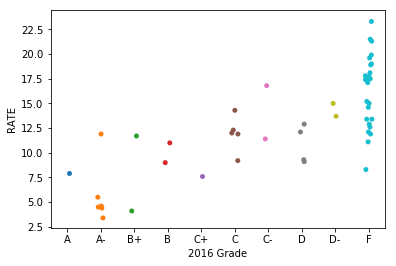

In [63]:
sb.stripplot(x='2016 Grade',y='RATE',data=merged,jitter=True)

Sources: CDC (https://www.cdc.gov/nchs/pressroom/sosmap/firearm_mortality/firearm.htm)<br>
Law Center to Prevent Gun Violence(http://lawcenter.giffords.org/scorecard2016/)
<br>
<br>

There is a clear trend that as the gun law grade worsens, the firearm death rate increases. This shows a clear correlation but is a very rough draft and could be made much more visually appealing.

# Suicide rate by state

Look at the suicide rates and gun law grades by state

In [15]:
import plotly.plotly as py
py.sign_in('kriener', '8ocyp7FxXQTYXti9bGmL')

In [5]:
suicide=pd.read_csv("SUICIDE2016.csv")

In [6]:
suicide['state_abbr']=suicide['STATE']

In [7]:
suicide.STATE = suicide.state_abbr.map(states)

In [8]:
merged=gun_laws.merge(suicide,how='inner',left_on='State',right_on='STATE')

In [9]:
merged.head()

,Gun Law Rank,State,2016 Grade,Gun Death Rate Rank,Background Checks,STATE,RATE,DEATHS,URL,state_abbr
0,1,California,A,43,X,California,10.5,"4,294",/nchs/pressroom/states/california/california.htm,CA
1,2,Connecticut,A-,46,X,Connecticut,10.1,397,/nchs/pressroom/states/connecticut/connecticut...,CT
2,3,New Jersey,A-,45,X,New Jersey,7.2,687,/nchs/pressroom/states/newjersey/newjersey.htm,NJ
3,4,Massachusetts,A-,50,X,Massachusetts,8.8,631,/nchs/pressroom/states/massachusetts/massachus...,MA
4,5,Maryland,A-,27,X,Maryland,9.4,586,/nchs/pressroom/states/maryland/maryland.htm,MD


In [21]:
for col in merged.columns:
    merged[col] = merged[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

merged['text'] = merged['STATE'] + '<br>' +\
    'Rate: '+merged['RATE']+'<br>'+ 'Grade: '+merged['2016 Grade']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = merged['state_abbr'],
        z = merged['RATE'].astype(float),
        locationmode = 'USA-states',
        text = merged['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Deaths per 100,000")
        ) ]

layout = dict(
        title = '2016 Suicide Rate by State<br>(Hover for rate and grade)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='suicide by state DRAFT' )

Sources: CDC (https://www.cdc.gov/nchs/pressroom/sosmap/suicide-mortality/suicide.htm)<br>
Law Center to Prevent Gun Violence(http://lawcenter.giffords.org/scorecard2016/)

States with worse gun control laws typically have higher suicide rates. This graph still needs a lot of work as I was just trying different ways to display the findings. I want an easier and more obvious way to show the grade each state got, perhaps with outlines or borders to distinguish states. I also want to separate firearm suicides and all other suicides which will take some more research.<br>
If chart is not visible there is a .png on Github.